In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from xgcm import Grid

In [5]:
ds0 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq0/INPUT/new_old_wind.nc", decode_times=False)
ds2 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/INPUT/0.02winds.nc", decode_times=False)
ds3 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/INPUT/0.03winds.nc", decode_times=False)
ds4 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq4/INPUT/no_curl_and_south.nc", decode_times=False)

ds_eq0 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq0/INPUT/wind_sample_nov_10.nc")
ds_eq2 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq2/INPUT/new_wind.nc")
ds_eq3_wind = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq3/INPUT/wind_eq3.nc")
ds_eq4 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq4/INPUT/no_curl_no_south.nc")

# ds = xr.open_dataset("/vortex1/jupyter-sanjanasatish/0.02new/linear_d2_cont__4308_020.nc", decode_times=False)
# ds_grid = xr.open_dataset("/vortex1/jupyter-sanjanasatish/winds/linear_d2_prog__3003_346.nc", decode_times=False)
# grid1 = Grid(ds_grid, coords= {'X':{'center':'xh','outer':'xq'}, 'Y':{'center':'yh','outer':'yq'}, 'Z':{'center':'zl','outer':'zi'}},periodic=['X'])

In [6]:
#South02
ds_seqw_prog = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/linear_d2_cont__4911_274.nc", decode_times=False)
ds_seq3_prog = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq3/linear_d2_cont__4907_235.nc", decode_times=False)
ds_seq0_prog = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq0/linear_d2_cont__5308_170.nc", decode_times=False)
ds_scurl0_prog = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq4/linear_d2_cont__4947_225.nc", decode_times=False)


#South01
ds_eqw_prog = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq2/linear_d2_cont__4303_021.nc", decode_times=False)
ds_eq3_prog = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq3/linear_d2_cont__3208_295.nc", decode_times=False)
ds_eq0_prog = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq0/linear_d2_cont__3023_341.nc", decode_times=False)
ds_curl0_prog = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq4/new/linear_d2_cont__4208_045.nc", decode_times=False)

In [7]:
zonalmean0 = ds0.mean(dim =['xq'])
zonalmean2 = ds2.mean(dim =['xq'])
zonalmean3 = ds3.mean(dim =['xq'])
zonalmean4 = ds4.mean(dim =['xq'])

zonalmean_eq0 = ds_eq0.mean(dim =['xq'])
zonalmean_eq2 = ds_eq2.mean(dim =['xq'])
zonalmean_eq3 = ds3.mean(dim =['xq'])
zonalmean_eq4 = ds_eq4.mean(dim =['xq'])

In [8]:
yh = np.linspace(-69.5,69.5,140)
sin_yh = np.sin(np.radians(yh))

In [9]:
Vx0 = -(zonalmean0.taux)/(1025*7.3*(10**-5)* sin_yh)
Vx2 = -(zonalmean2.taux)/(1025*7.3*(10**-5)* sin_yh)
Vx3 = -(zonalmean3.taux)/(1025*7.3*(10**-5)* sin_yh)
Vx4 = -(zonalmean4.taux)/(1025*7.3*(10**-5)* sin_yh)

Vx_eq0 = -(zonalmean_eq0.taux)/(1025*7.3*(10**-5)* sin_yh)
Vx_eq2 = -(zonalmean_eq2.taux)/(1025*7.3*(10**-5)* sin_yh)
Vx3 = -(zonalmean3.taux)/(1025*7.3*(10**-5)* sin_yh)
Vx_eq4 = -(zonalmean_eq4.taux)/(1025*7.3*(10**-5)* sin_yh)

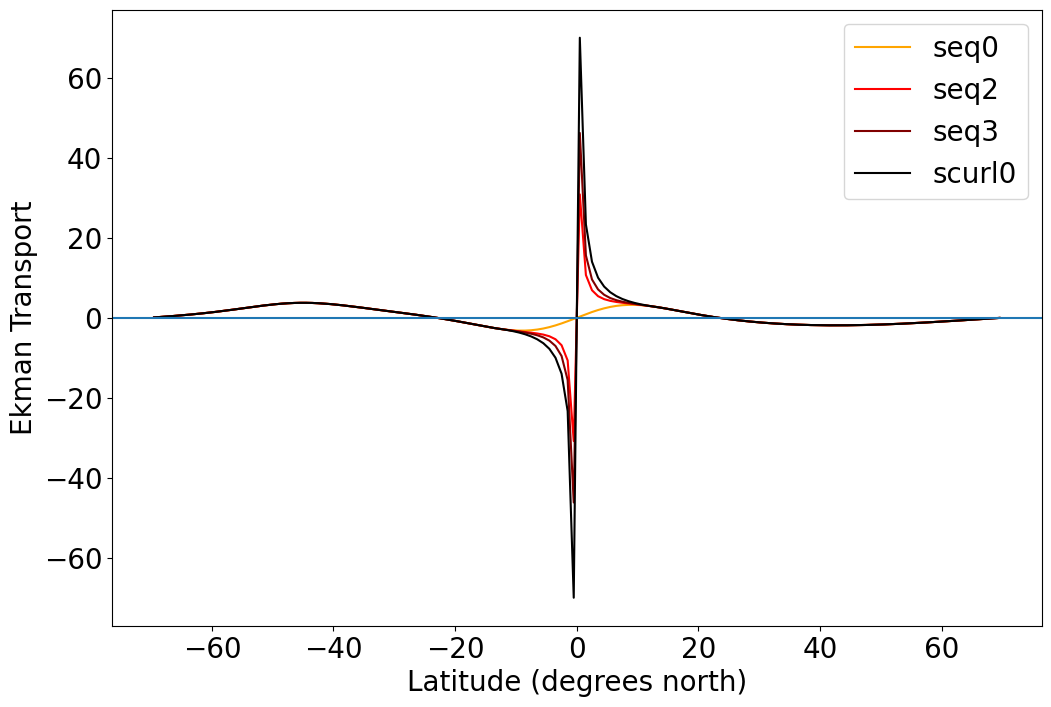

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

Vx0.plot(ax=ax, color="orange", label="seq0")
Vx2.plot(ax=ax, color="red", label="seq2")
Vx3.plot(ax=ax, color="maroon", label="seq3")
Vx4.plot(ax=ax, color="black", label="scurl0")

ax.legend(prop={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)
plt.axhline(y=0)
plt.xlabel('Latitude (degrees north)', fontsize=20)
plt.ylabel('Ekman Transport', fontsize=20)
plt.show()

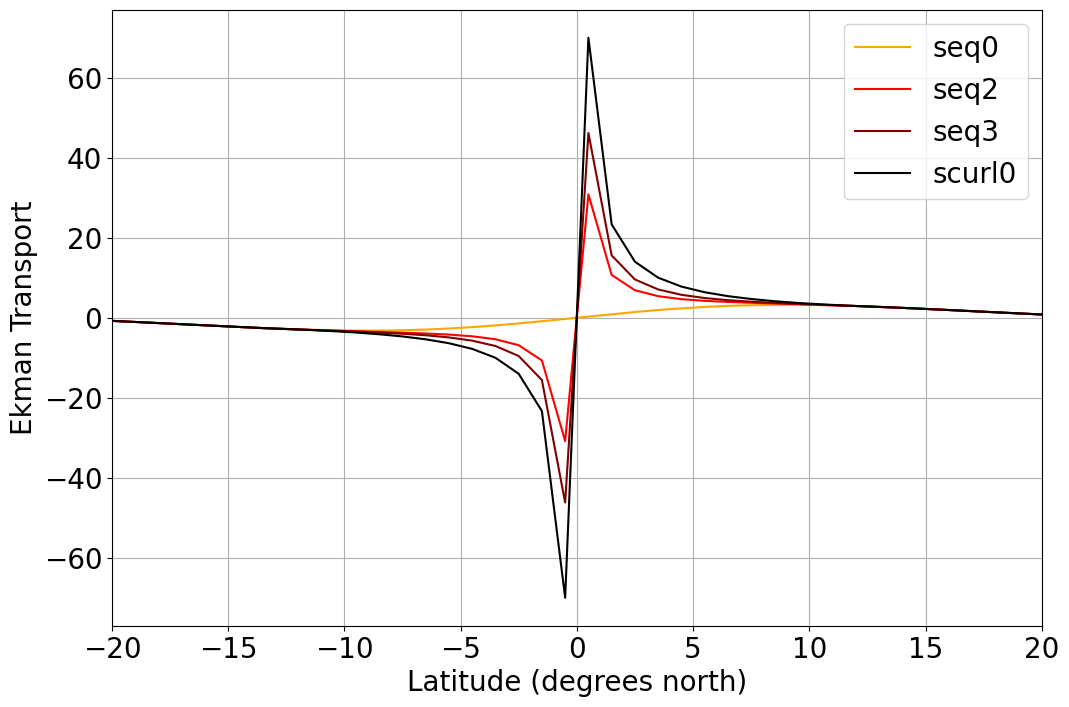

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

Vx0.plot(ax=ax, color="orange", label="seq0")
Vx2.plot(ax=ax, color="red", label="seq2")
Vx3.plot(ax=ax, color="maroon", label="seq3")
Vx4.plot(ax=ax, color="black", label="scurl0")

ax.legend(prop={'size': 20})  # Increase legend font size here
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Latitude (degrees north)', fontsize=20)
plt.ylabel('Ekman Transport', fontsize=20)
plt.gca().set_xlim(-20,20)
plt.grid()
plt.savefig('ektransp')

plt.show()

# Streamfunction

In [10]:
depth = ds_seq0_prog.zl.isel(zl=slice(0,6))
lat = ds_seq0_prog.yh
longar = 6.3*np.cos(np.radians(lat))*np.radians(80)
#80 in radians

In [11]:
depth

<xarray.DataArray 'zl' (zl: 6)> Size: 48B
array([  6.5,  20.5,  36.5,  55. ,  76.5, 101. ])
Coordinates:
  * zl       (zl) float64 48B 6.5 20.5 36.5 55.0 76.5 101.0
Attributes:
    long_name:       Layer pseudo-depth, -z*
    units:           meter
    cartesian_axis:  Z
    positive:        down

In [12]:
st0 =  (Vx0 * (1 - depth/(depth[-1])))*longar
st2 =  (Vx2 * (1 - depth/(depth[-1])))*longar
st3 =  (Vx3 * (1 - depth/(depth[-1])))*longar
st4 =  (Vx4 * (1 - depth/(depth[-1])))*longar

steq0 =  (Vx_eq0 * (1 - depth/(depth[-1])))*longar
steq2 =  (Vx_eq2 * (1 - depth/(depth[-1])))*longar
steq3 =  (Vx3 * (1 - depth/(depth[-1])))*longar
steq4 =  (Vx_eq4 * (1 - depth/(depth[-1])))*longar

In [14]:
yay=(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)

(200.0, 0.0)

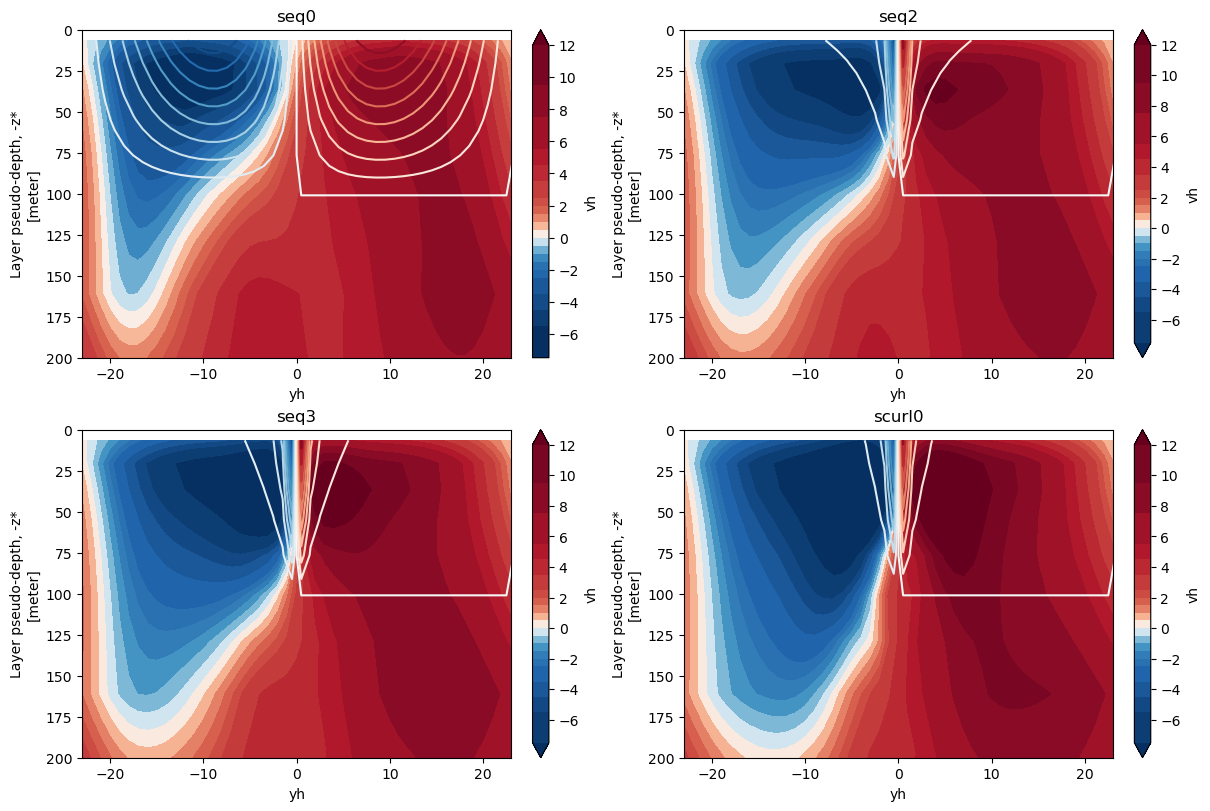

In [13]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))

(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,0], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=yay.min(), vmax=12))
(((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,1], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=yay.min(), vmax=12))
(((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[1,0], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=yay.min(), vmax=12))
(((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[1,1], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=yay.min(), vmax=12))

# (((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,1], levels=40, cmap='RdBu_r', vmax=12)
# (((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,1], levels=40, cmap='RdBu_r', vmax=12)
# (((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[1,0], levels=40, cmap='RdBu_r', vmax=12)
# (((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[1,1], levels=40, cmap='RdBu_r', vmax=12)

a=st0.plot.contour(x='yh',levels=20, ax=ax[0,0])
b=st2.plot.contour(x='yh',levels=20, ax=ax[0,1])
c=st3.plot.contour(x='yh',levels=20, ax=ax[1,0])
d=st4.plot.contour(x='yh',levels=20, ax=ax[1,1])


ax[0,0].set_title("seq0")
ax[0,1].set_title("seq2")
ax[1,1].set_title("scurl0")
ax[1,0].set_title("seq3")

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

ax[0,0].set_xlim(-23,23)
ax[0,1].set_xlim(-23,23)
ax[1,0].set_xlim(-23,23)
ax[1,1].set_xlim(-23,23)

ax[0,0].set_ylim(200,0)
ax[0,1].set_ylim(200,0)
ax[1,0].set_ylim(200,0)
ax[1,1].set_ylim(200,0)

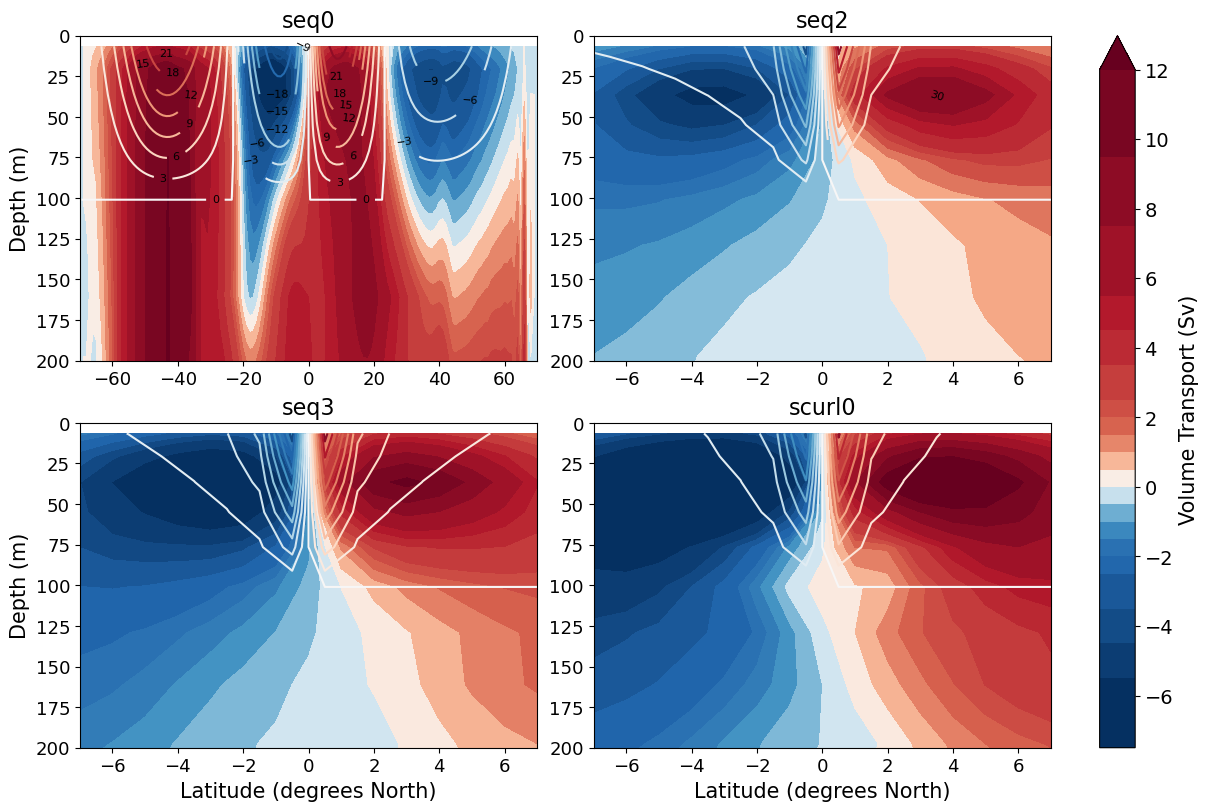

In [49]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))

contour0=(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,0], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=yay.min(), vmax=12),add_colorbar=False)
contour1=((((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[0,1], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=yay.min(), vmax=12), add_colorbar=False)
contour2=((((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,0], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=yay.min(), vmax=12), add_colorbar=False)
contour3=((((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,1], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=yay.min(), vmax=12), add_colorbar=False)



# contour0=(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,0], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False)
# contour1=((((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[0,1], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False)
# contour2=((((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,0], levels=40, cmap='RdBu_r', vmax=12,add_colorbar=False)
# contour3=((((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,1], levels=40, cmap='RdBu_r', vmax=12,add_colorbar=False)

contours=[contour0,contour1,contour2,contour3]

a=st0.plot.contour(x='yh',levels=20, ax=ax[0,0])
b=st2.plot.contour(x='yh',levels=20, ax=ax[0,1])
c=st3.plot.contour(x='yh',levels=20, ax=ax[1,0])
d=st4.plot.contour(x='yh',levels=20, ax=ax[1,1])


a.clabel(fontsize=8,colors='black')
b.clabel(fontsize=8,colors='black')
c.clabel(fontsize=8,colors='black')
d.clabel(fontsize=8,colors='black')


ax[0,0].set_title("seq0", fontsize=16)
ax[0,1].set_title("seq2", fontsize=16)
ax[1,1].set_title("scurl0", fontsize=16)
ax[1,0].set_title("seq3", fontsize=16)

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

ax[0,1].set_xlim(-7,7)
ax[1,0].set_xlim(-7,7)
ax[1,1].set_xlim(-7,7)

ax[0,0].set_ylim(200,0)
ax[0,1].set_ylim(200,0)
ax[1,0].set_ylim(200,0)
ax[1,1].set_ylim(200,0)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (m)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (m)", fontsize = 15)
ax[1,1].set_ylabel('')

cbar = fig.colorbar(contours[0], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Volume Transport (Sv)', fontsize=15) 

/home/sanjana/miniconda3/envs/amoc/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2001: UserWarning: The following kwargs were not used by contour: 'linestyle'
  primitive = ax.contour(x, y, z, **kwargs)


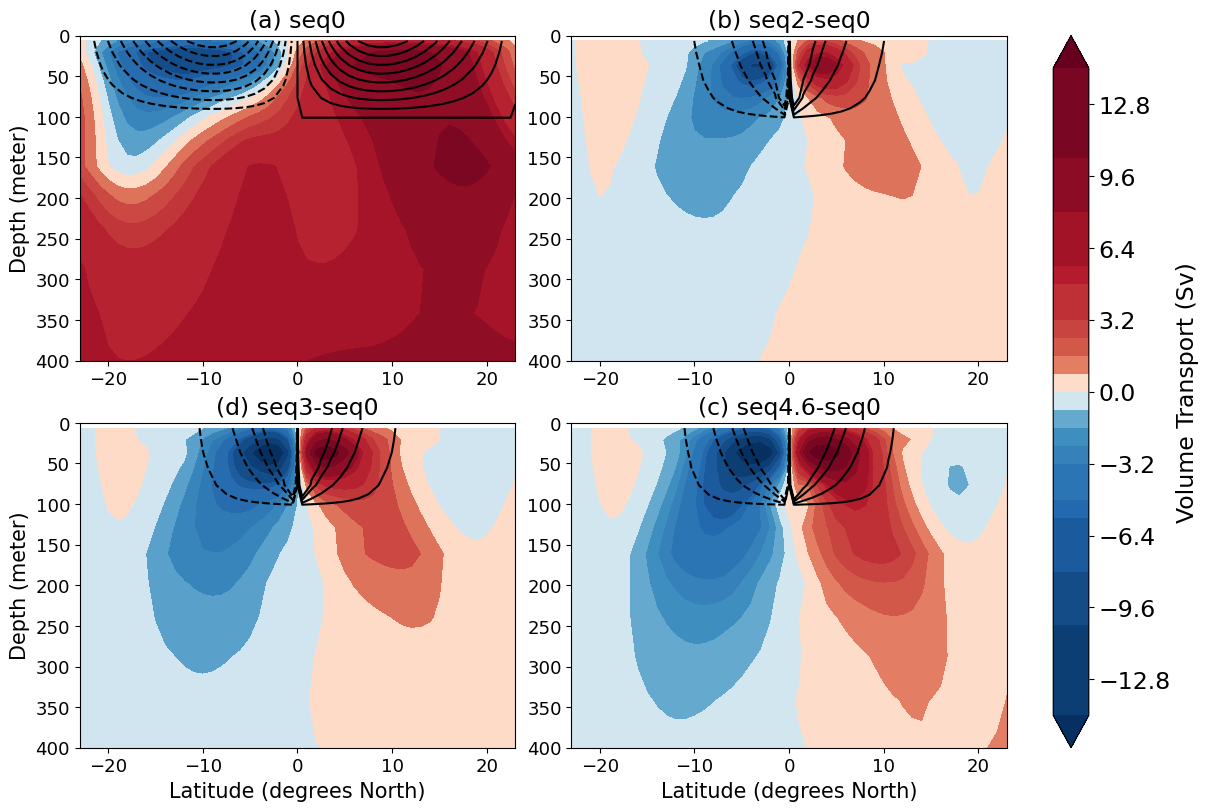

In [24]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))
contour0=(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,0], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=-14, vmax=14),add_colorbar=False)
contour1=((((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[0,1], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=-14, vmax=14), add_colorbar=False)
contour2=((((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,0], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=-14, vmax=14), add_colorbar=False)
contour3=((((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,1], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=-14, vmax=14), add_colorbar=False)

contours=[contour0,contour1,contour2,contour3]
cp1=[-40,-25,-10,-1,1,10,25,40]

a=st0.plot.contour(x='yh',levels=20, ax=ax[0,0], colors='black',linestyle='-')

b=(st2-st0).plot.contour(x='yh',levels=cp1, ax=ax[0,1], colors ='black', linestyle='-')

c=(st3-st0).plot.contour(x='yh',levels=cp1, ax=ax[1,0], colors ='black',linestyle='-')

d=(st4-st0).plot.contour(x='yh',levels=cp1, ax=ax[1,1], colors ='black',linestyle='-')

# a.clabel(fontsize=8,colors='black')
# b.clabel(fontsize=8,colors='black')
# c.clabel(fontsize=8,colors='black')
# d.clabel(fontsize=8,colors='black')


ax[0,0].set_title("(a) seq0", fontsize=17)
ax[0,1].set_title("(b) seq2-seq0", fontsize=17)
ax[1,1].set_title("(c) seq4.6-seq0", fontsize=17)
ax[1,0].set_title("(d) seq3-seq0", fontsize=17)

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

ax[0,1].set_xlim(-10,10)
ax[1,0].set_xlim(-10,10)
ax[1,1].set_xlim(-10,10)

ax[0,0].set_xlim(-23,23)
ax[0,1].set_xlim(-23,23)
ax[1,0].set_xlim(-23,23)
ax[1,1].set_xlim(-23,23)

ax[0,0].set_ylim(400,0)
ax[0,1].set_ylim(400,0)
ax[1,0].set_ylim(400,0)
ax[1,1].set_ylim(400,0)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (meter)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (meter)", fontsize = 15)
ax[1,1].set_ylabel('')

# Add a common colorbar
cbar = fig.colorbar(contours[3], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=17)
cbar.set_label('Volume Transport (Sv)', fontsize=17)  # Set the colorbar title

plt.savefig('ekstr.png')


/home/sanjana/miniconda3/envs/amoc/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2001: UserWarning: The following kwargs were not used by contour: 'linestyle'
  primitive = ax.contour(x, y, z, **kwargs)


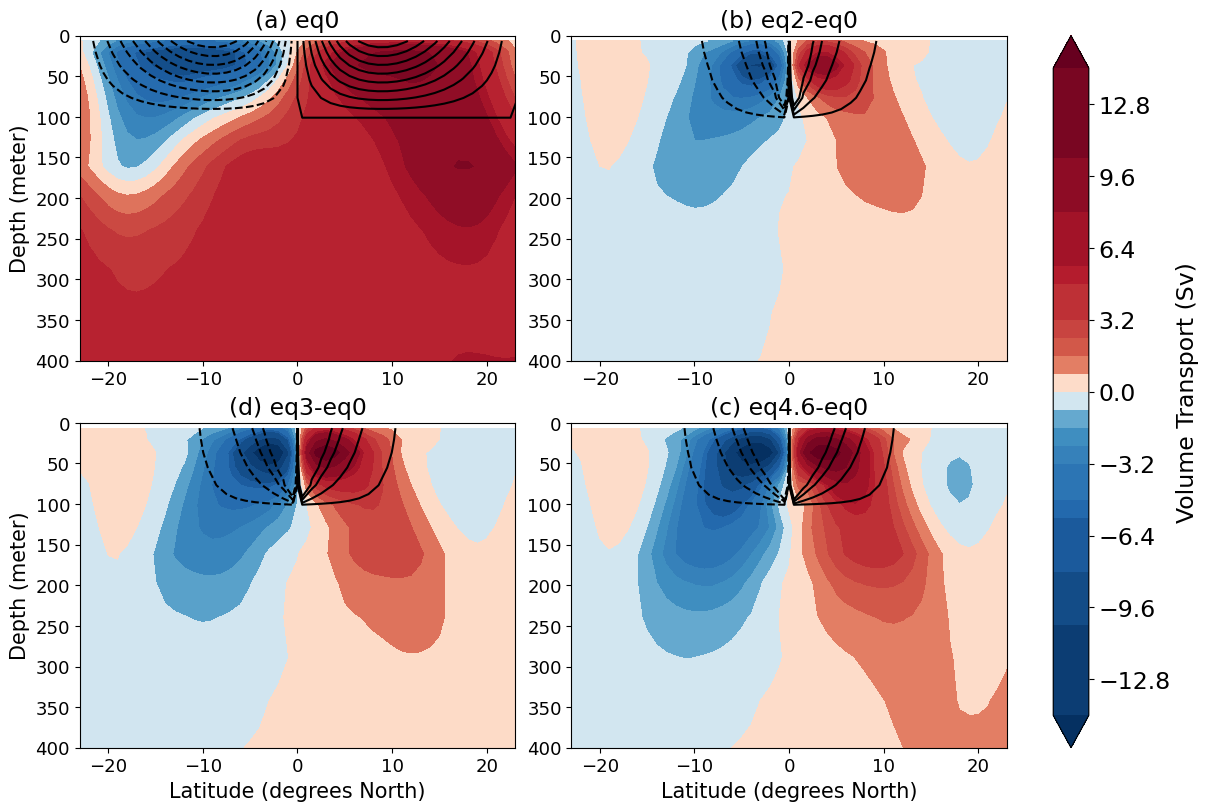

In [10]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))
contour0=(((ds_eq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,0], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=-14, vmax=14),add_colorbar=False)
contour1=((((ds_eqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_eq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[0,1], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=-14, vmax=14), add_colorbar=False)
contour2=((((ds_eq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_eq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,0], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=-14, vmax=14), add_colorbar=False)
contour3=((((ds_curl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_eq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,1], levels=40, cmap='RdBu_r',norm=colors.SymLogNorm(linthresh=1, vmin=-14, vmax=14), add_colorbar=False)

contours=[contour0,contour1,contour2,contour3]
cp1=[-40,-25,-10,-1,1,10,25,40]

a=steq0.plot.contour(x='yh',levels=20, ax=ax[0,0], colors='black',linestyle='-')

b=(steq2-steq0).plot.contour(x='yh',levels=cp1, ax=ax[0,1], colors ='black', linestyle='-')

c=(st3-st0).plot.contour(x='yh',levels=cp1, ax=ax[1,0], colors ='black',linestyle='-')

d=(steq4-steq0).plot.contour(x='yh',levels=cp1, ax=ax[1,1], colors ='black',linestyle='-')

# a.clabel(fontsize=8,colors='black')
# b.clabel(fontsize=8,colors='black')
# c.clabel(fontsize=8,colors='black')
# d.clabel(fontsize=8,colors='black')


ax[0,0].set_title("(a) eq0", fontsize=17)
ax[0,1].set_title("(b) eq2-eq0", fontsize=17)
ax[1,1].set_title("(c) eq4.6-eq0", fontsize=17)
ax[1,0].set_title("(d) eq3-eq0", fontsize=17)

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

ax[0,1].set_xlim(-10,10)
ax[1,0].set_xlim(-10,10)
ax[1,1].set_xlim(-10,10)

ax[0,0].set_xlim(-23,23)
ax[0,1].set_xlim(-23,23)
ax[1,0].set_xlim(-23,23)
ax[1,1].set_xlim(-23,23)

ax[0,0].set_ylim(400,0)
ax[0,1].set_ylim(400,0)
ax[1,0].set_ylim(400,0)
ax[1,1].set_ylim(400,0)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (meter)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (meter)", fontsize = 15)
ax[1,1].set_ylabel('')

# Add a common colorbar
cbar = fig.colorbar(contours[3], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=17)
cbar.set_label('Volume Transport (Sv)', fontsize=17)  # Set the colorbar title

plt.savefig('ekstr.png')


# Ideal and real wind gyre component

(400.0, 0.0)

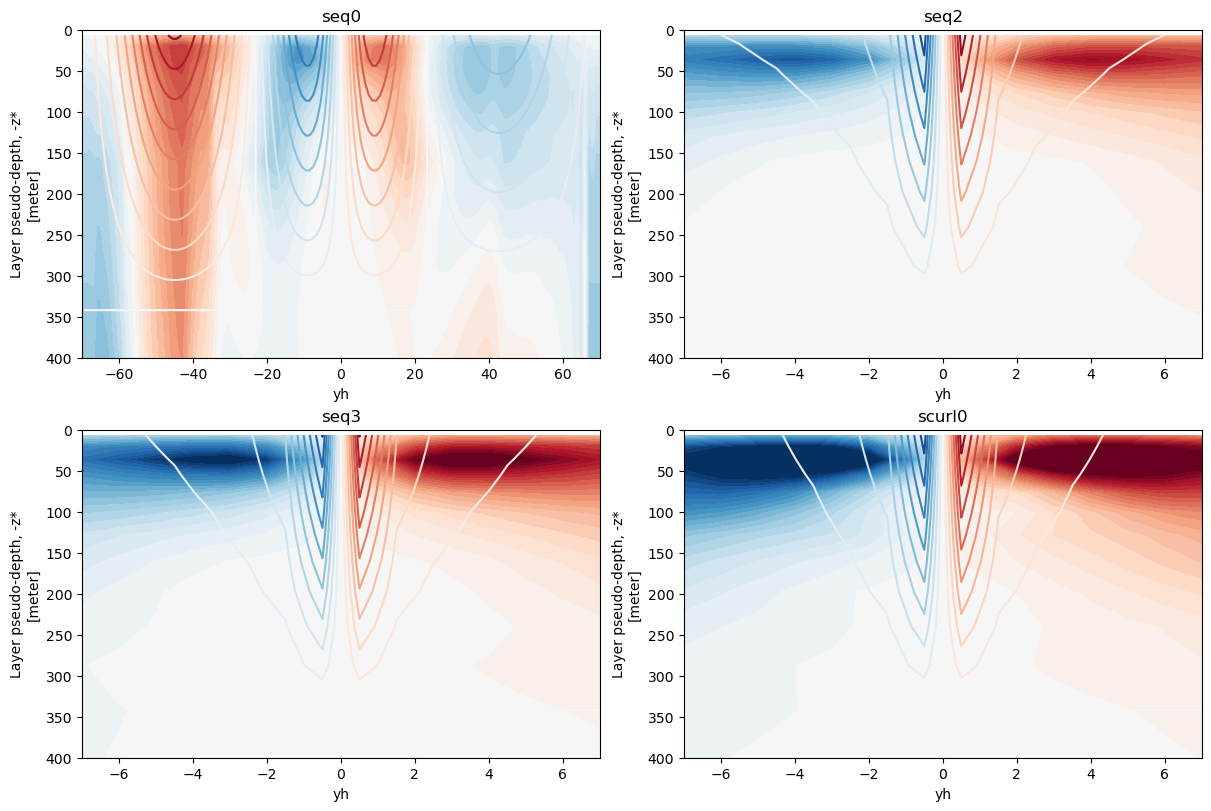

In [16]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))
((((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq0_prog.vh.isel(yq=70, Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[0,0], levels=40, cmap='RdBu_r', vmax=15, add_colorbar=False)
((((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seqw_prog.vh.isel(yq=70, Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[0,1], levels=40, cmap='RdBu_r', vmax=15, add_colorbar=False)
((((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_seq3_prog.vh.isel(yq=70, Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,0], levels=40, cmap='RdBu_r', vmax=15,add_colorbar=False)
((((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6)-(((ds_scurl0_prog.vh.isel(yq=70, Time=-1)).sum('xh').cumsum('zl'))*10**-6)).plot.contourf(ax=ax[1,1], levels=40, cmap='RdBu_r', vmax=15,add_colorbar=False)

a=st0.plot.contour(x='yh',levels=20, ax=ax[0,0])
b=st2.plot.contour(x='yh',levels=20, ax=ax[0,1])
c=st3.plot.contour(x='yh',levels=20, ax=ax[1,0])
d=st4.plot.contour(x='yh',levels=20, ax=ax[1,1])

# a.clabel(fontsize=8,colors='black')
# b.clabel(fontsize=8,colors='black')
# c.clabel(fontsize=8,colors='black')
# d.clabel(fontsize=8,colors='black')


ax[0,0].set_title("seq0")
ax[0,1].set_title("seq2")
ax[1,1].set_title("scurl0")
ax[1,0].set_title("seq3")

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

ax[0,1].set_xlim(-7,7)
ax[1,0].set_xlim(-7,7)
ax[1,1].set_xlim(-7,7)

ax[0,0].set_ylim(400,0)
ax[0,1].set_ylim(400,0)
ax[1,0].set_ylim(400,0)
ax[1,1].set_ylim(400,0)

# wind streamlines

In [28]:
cp1=[-0.5,-1,-1.5,-2,-2.5,0,0.5,1,1.5,2,2.5,3]
cp2 = [-25,-20,-15, -10,-5,0,5,10,15,20,25]

(-7.0, 7.0)

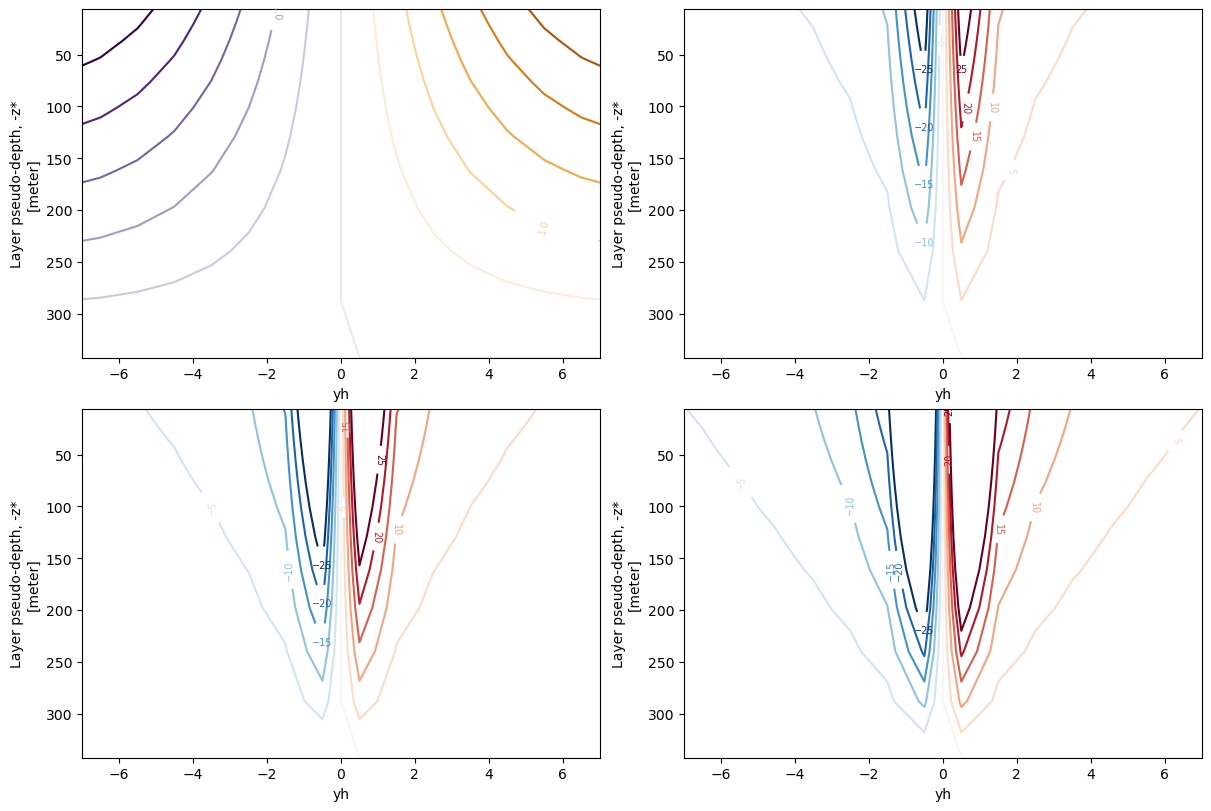

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

a=st0.plot.contour(x='yh',levels=cp1, ax=ax[0,0], cmap='PuOr_r')
b=st2.plot.contour(x='yh',levels=cp2, ax=ax[0,1])
c=st3.plot.contour(x='yh',levels=cp2, ax=ax[1,0])
d=st4.plot.contour(x='yh',levels=cp2, ax=ax[1,1])

a.clabel(fontsize=7)
b.clabel(fontsize=7)
c.clabel(fontsize=7)
d.clabel(fontsize=7)

ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,0].invert_yaxis()
ax[1,1].invert_yaxis()

ax[0,0].set_xlim(-7,7)
ax[0,1].set_xlim(-7,7)
ax[1,0].set_xlim(-7,7)
ax[1,1].set_xlim(-7,7)

(-10.0, 10.0)

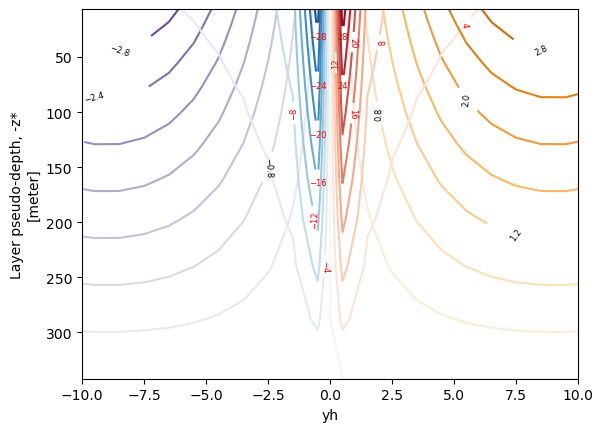

In [33]:
a1=st0.plot.contour(x='yh',levels=20, cmap='PuOr_r')
b1=st2.plot.contour(x='yh', levels=20)

a1.clabel(fontsize=6, colors='black')
b1.clabel(fontsize=6, colors='r')
plt.gca().invert_yaxis()
plt.gca().set_xlim(-10,10)